In [1]:
from Network import *
from Task import *
from HelperFunctions import *
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.interpolate
import numpy as np

device = None

In [2]:
TASK = 'trace' #'tracesearch' 'searchtrace'
SAVE = False
figure_folder = r'C:\Users\Sami\Desktop\PhD\Paper\Figures'

# **Make the database**

In [87]:
if not os.path.isfile('NetworksTrace.pkl'):
    Networks = []
    Trials = []
    Generalization = []
    
    with open('ResultsTracetorch.pkl', 'rb') as input:
        results = pickle.load(input)
    
    ListNetwork = [results[i][0][0] for i in range(23)]
    ListPerfo = [results[i][0][1] for i in range(23)]
    ListGene = [results[i][0][2] for i in range(23)]

    resultsdict = {'Network':ListNetwork,'Performance':ListPerfo,'Generalization':ListGene}

    df = pd.DataFrame(resultsdict)
    df.to_pickle("NetworksTrace.pkl")

if not os.path.isfile('NetworksSearchTrace.pkl'):
    Networks = []
    Trials = []
    Generalization = []
    
    with open('ResultsSearchTracetorch.pkl', 'rb') as input:
        results = pickle.load(input)
    
    ListNetwork = [results[i][0][0] for i in range(23)]
    ListPerfo = [results[i][0][1] for i in range(23)]
    ListGene = [results[i][0][2] for i in range(23)]

    resultsdict = {'Network':ListNetwork,'Performance':ListPerfo,'Generalization':ListGene}

    df = pd.DataFrame(resultsdict)
    df.to_pickle("NetworksSearchTrace.pkl")

if not os.path.isfile('NetworksTraceSearch.pkl'):
    Networks = []
    Trials = []
    Generalization = []
    
    with open('ResultsTraceSearchtorch.pkl', 'rb') as input:
        results = pickle.load(input)
    
    ListNetwork = [results[i][0][0] for i in range(23)]
    ListPerfo = [results[i][0][1] for i in range(23)]
    ListGene = [results[i][0][2] for i in range(23)]

    resultsdict = {'Network':ListNetwork,'Performance':ListPerfo,'Generalization':ListGene}

    df = pd.DataFrame(resultsdict)
    df.to_pickle("NetworksTraceSearch.pkl")

In [51]:
if TASK == 'trace':
    networks_base = open_base('NetworksTrace')
elif TASK == 'searchtrace':
  networks_base = open_base('NetworksSearchTrace')
elif TASK == 'tracesearch':
  networks_base = open_base('NetworksTraceSearch')
else:
  raise Exception('TASK should be trace, tracesearch or searchtrace')

In [4]:
length = []
for i in range(len(networks_base['Network'])):
        length.append(len(networks_base['Performance'][i]))
length

[22007,
 20008,
 20007,
 22008,
 24007,
 22007,
 24006,
 26006,
 28006,
 28006,
 26008,
 28007,
 28006,
 32007,
 30007,
 38005,
 50007,
 50005,
 64006,
 100000,
 100000,
 100000,
 100000]

## Generalization

C:\Users\Sami\AppData\Local\Temp/ipykernel_20244/957367177.py:11: RuntimeWarning: Mean of empty slice
  Gen = np.nanmean(Generalization,axis=2)
C:\Users\Sami\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


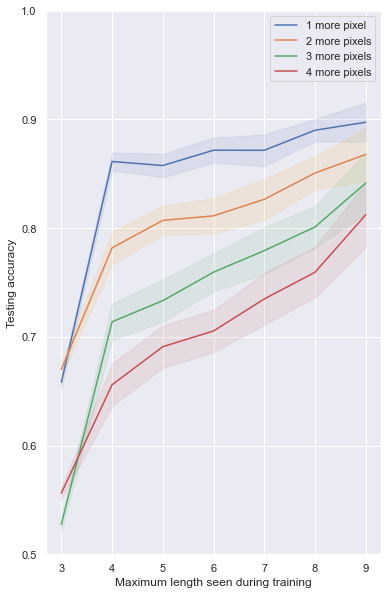

In [52]:
sns.set(rc={'figure.figsize':(6,10)})
number_converged = len([len(networks_base['Performance'][i]) for i in range(len(networks_base)) if len(networks_base['Performance'][i])<100000])
Generalization = np.zeros((7,10,number_converged))
j=0
for i in range(len(networks_base)):
        if len(networks_base['Performance'][i]) < 100000:
          Generalization[:,:,j] = networks_base['Generalization'][i]
          j += 1

Generalization[Generalization == 0] = np.nan
Gen = np.nanmean(Generalization,axis=2)
Std = np.nanstd(Generalization,axis=2)
SemPlus =  Gen + Std / np.sqrt(number_converged)
SemMinus = Gen - Std / np.sqrt(number_converged)
#Gen[Gen == 0] = np.nan

plt.plot(np.diag(Gen,0))
plt.fill_between(np.arange(7), np.diag(SemPlus,0),np.diag(SemMinus,0), color='b', alpha=.1)
print()

plt.plot(np.diag(Gen,1))
plt.fill_between(np.arange(7), np.diag(SemPlus,1),np.diag(SemMinus,1), color='orange', alpha=.1)

plt.plot(np.diag(Gen,2))
plt.fill_between(np.arange(7), np.diag(SemPlus,2),np.diag(SemMinus,2), color='g', alpha=.1)

plt.plot(np.diag(Gen,3))
plt.fill_between(np.arange(7), np.diag(SemPlus,3),np.diag(SemMinus,3), color='r', alpha=.1)

plt.legend(['1 more pixel','2 more pixels','3 more pixels','4 more pixels'])
plt.xlabel('Maximum length seen during training')
plt.xticks([0,1,2,3,4,5,6],[3,4,5,6,7,8,9])
plt.ylabel('Testing accuracy')
plt.ylim([0.5,1])


if SAVE:
    plt.savefig(figure_folder+'\generalization_' + TASK  +'.eps', format='eps')

In [53]:
test = np.diagonal(Generalization,offset =3,axis1=0,axis2=1)
from scipy.stats import wilcoxon
w, p = wilcoxon(test[:,-1]-0.5)
print(p)

9.5367431640625e-07


In [47]:
test

array([[0.526, 0.67 , 0.686, 0.642, 0.684, 0.71 , 0.816],
       [0.53 , 0.524, 0.666, 0.59 , 0.774, 0.964, 0.952],
       [0.55 , 0.672, 0.614, 0.59 , 0.664, 0.652, 0.994],
       [0.524, 0.714, 0.736, 0.684, 0.89 , 0.97 , 0.952],
       [0.496, 0.504, 0.718, 0.696, 0.948, 0.9  , 0.94 ],
       [0.536, 0.666, 0.72 , 0.688, 0.734, 0.956, 0.988],
       [0.564, 0.732, 0.724, 0.596, 0.66 , 0.702, 0.834],
       [0.486, 0.692, 0.622, 0.582, 0.684, 0.81 , 0.654],
       [0.516, 0.55 , 0.678, 0.72 , 0.972, 0.958, 0.954],
       [0.538, 0.55 , 0.732, 0.73 , 0.678, 0.766, 0.89 ],
       [0.546, 0.662, 0.588, 0.66 , 0.604, 0.752, 0.678],
       [0.518, 0.506, 0.592, 0.648, 0.642, 0.968, 0.946],
       [0.496, 0.61 , 0.674, 0.724, 0.746, 0.788, 0.992],
       [0.532, 0.696, 0.756, 0.614, 0.706, 0.976, 0.978],
       [0.502, 0.728, 0.712, 0.7  , 0.808, 0.89 , 0.868],
       [0.524, 0.71 , 0.744, 0.65 , 0.914, 0.98 , 0.724],
       [0.544, 0.658, 0.6  , 0.558, 0.712, 0.686, 0.908],
       [0.566,

# **Run and save**

In [6]:
networks_base['Generalization'][4]

array([[0.72 , 0.624, 0.538, 0.56 , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.87 , 0.768, 0.718, 0.712, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.854, 0.796, 0.73 , 0.678, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.91 , 0.83 , 0.786, 0.728, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.97 , 0.948, 0.924, 0.882, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.902, 0.846, 0.728, 0.65 ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.922, 0.91 , 0.894,
        0.87 ]])

In [4]:
CurveLength = 9
TrialNumber = 1000
t = SearchTrace(4)
t.no_curves = False
t.only_trace_curve = False
TargetTrace = []
DistractorTrace = []
Corrects = []
Feature = []
TargetCurve = []
DistrCurve = []
NumberOfTrial = []
LengthOfCurve = []
max_dur = 50


for i in range(15,19):
    #if networks_base['has_converged'][i]:
        n=networks_base['Network'][i]
        Target = np.zeros((n.grid_size ** 2+2,4,n.n_hidden_features,CurveLength+1,max_dur))  #pixels, hidden layers, features, position on the curve, timestep
        Distractor = np.zeros((n.grid_size ** 2+2,4,n.n_hidden_features,CurveLength+1,max_dur))
        CountTarget = np.zeros((n.grid_size ** 2+2,4,n.n_hidden_features,CurveLength+1,max_dur))
        CountDistractor = np.zeros((n.grid_size ** 2+2,4,n.n_hidden_features,CurveLength+1,max_dur))
        CorrectsInterm = []
        FeatureInterm = []
        TargetCurveInterm = []
        DistrCurveInterm = []
        NumberOfTrialInterm = []
        LengthOfCurveInterm = []
        for j in range(1):
          n=networks_base['Network'][i]
          n,corrects,feature_history,target_history,distr_history,position_history,display = RunTrials(t,CurveLength,TrialNumber,n,device)
            
          CorrectsInterm = CorrectsInterm + corrects
          FeatureInterm = FeatureInterm + feature_history
          TargetCurveInterm = TargetCurveInterm + target_history
          DistrCurveInterm = DistrCurveInterm + distr_history
        
          Target,Distractor,CountTarget,CountDistractor = AverageTraces(n,CurveLength,TrialNumber,max_dur,target_history,distr_history,position_history,feature_history,corrects,Target,Distractor,CountTarget,CountDistractor)
        print('Network '+str(i)+' done')
        Target = Target/CountTarget
        Distractor = Distractor/CountDistractor
        TargetTrace.append(Target)
        DistractorTrace.append(Distractor)
        Corrects.append(np.mean(CorrectsInterm))
        Feature.append(FeatureInterm)
        TargetCurve.append(TargetCurveInterm)
        DistrCurve.append(DistrCurveInterm)
        NumberOfTrial.append(TrialNumber)
        LengthOfCurve.append(CurveLength)

resultsdict = {'TargetTrace':TargetTrace,'DistractorTrace':DistractorTrace,'Corrects':Corrects,'Feature':Feature,'TargetCurve':TargetCurve,'DistractorCurve':DistrCurve,'NTrials':NumberOfTrial,'NPixels':LengthOfCurve}
df = pd.DataFrame(resultsdict)
df.to_pickle("NetworksSearchTraceActivations4.pkl")

0.96
Network 0 done


C:\Users\Sami\AppData\Local\Temp/ipykernel_7448/219479371.py:42: RuntimeWarning: invalid value encountered in true_divide
  Target = Target/CountTarget
C:\Users\Sami\AppData\Local\Temp/ipykernel_7448/219479371.py:43: RuntimeWarning: invalid value encountered in true_divide
  Distractor = Distractor/CountDistractor


80.0

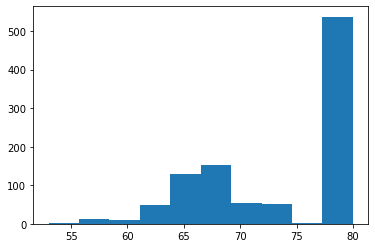

In [5]:
a = []
for i in range(1,1001):
    a.append((len(n.saveXmod[i])))
plt.hist(a)
np.median(a)

In [18]:
df = pd.DataFrame(resultsdict)
df.to_pickle("NetworksTraceActivations.pkl")

## Results

In [3]:
TASK = 'trace'

if TASK == 'trace':
    traces = open_base('NetworksTraceActivations')
elif TASK == 'searchtrace':
  traces = open_base('NetworksSearchTraceActivations')
elif TASK == 'tracesearch':
  traces = open_base('NetworksTraceSearchActivations')
else:
  raise Exception('TASK should be trace, tracesearch or searchtrace')


Target = np.zeros((402, 4, 4, 10, 50,len(traces['NPixels'])))
Distractor = np.zeros((402, 4, 4, 10, 50,len(traces['NPixels'])))

for i in range(len(traces['NPixels'])):
    Target[:,:,:,:,:,i] = traces['TargetTrace'][i]
    Distractor[:,:,:,:,:,i] = traces['DistractorTrace'][i]

### Timecourse of modulation

In [17]:
normalized_TD.shape

(10, 50)

C:\Users\Sami\AppData\Local\Temp/ipykernel_21260/3028481377.py:2: RuntimeWarning: Mean of empty slice
  TD = np.nanmean(Target,axis=-1) - np.nanmean(Distractor,axis=-1)
C:\Users\Sami\AppData\Local\Temp/ipykernel_21260/3028481377.py:5: RuntimeWarning: invalid value encountered in true_divide
  normalized_TD = normalized_TD/np.expand_dims(np.max(normalized_TD,axis = 1),axis = 1)


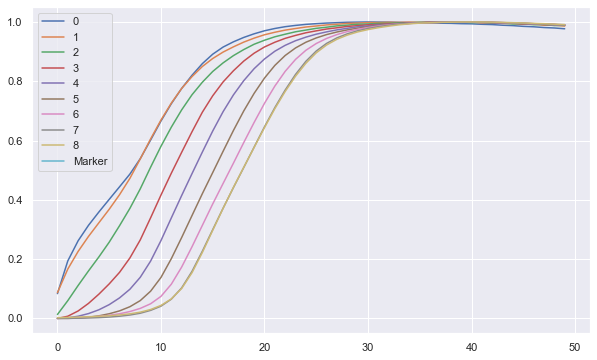

In [22]:
sns.set(rc={'figure.figsize':(10,6)})
TD = np.nanmean(Target,axis=-1) - np.nanmean(Distractor,axis=-1)
#TD = Target - Distractor
normalized_TD = np.nanmean(TD,axis = (0,1,2))
normalized_TD = normalized_TD/np.expand_dims(np.max(normalized_TD,axis = 1),axis = 1)
plt.plot(normalized_TD.T)
plt.legend(['0','1','2','3','4','5','6','7','8','Marker'])

if SAVE:
    plt.savefig(figure_folder+'\\timecourse_' + TASK  +'.eps', format='eps')

### Sign of modulation

C:\Users\Sami\AppData\Local\Temp/ipykernel_7880/3356423938.py:2: RuntimeWarning: invalid value encountered in true_divide
  Modulation = (Target - Distractor) / ((Target + Distractor) / 2)
C:\Users\Sami\AppData\Local\Temp/ipykernel_7880/3356423938.py:3: RuntimeWarning: Mean of empty slice
  Modulation = np.nanmean(Modulation,axis = -1)


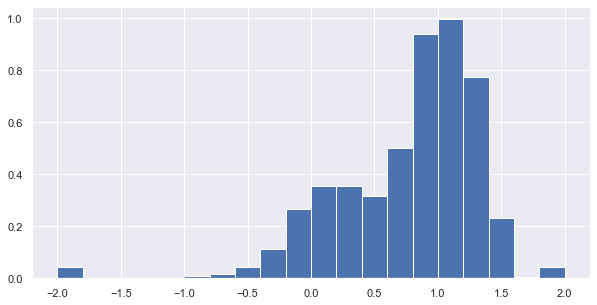

In [4]:
sns.set(rc={'figure.figsize':(10,5)})
Modulation = (Target - Distractor) / ((Target + Distractor) / 2)
Modulation = np.nanmean(Modulation,axis = -1)
Dprime = Modulation[:,:,:,:,-1].flatten()
plt.hist(Dprime,density=True,bins=20)

if SAVE:
    plt.savefig(figure_folder+'\modulation_' + TASK  +'.eps', format='eps')

In [17]:
y = np.nanmean(Dprime)
y

0.7691844176152779

In [18]:
(1+0.5*y)/(1-0.5*y) - 1

1.2498776073747337

### Cumulative modulation latency at individual recording sites

In [51]:
def latency_operation2(TD,operation,TASK,CurveLength,number_interpolation_points=500,dur=39,criterion=0.3,position_on_curve=0):
    
    if operation == 'search':
        neurons = [0,1] #first two neurons correspond to the search operation
        position_on_curve = -1 #we arbitrarily put them at the end of the curve_length dimension in TD
    elif operation == 'trace':
        neurons = np.arange(2,TD.shape[0])
    else:
        raise Exception("Operation is either search or trace")
        
    if operation == 'trace' and TASK == 'searchtrace':
        position_on_curve = 0 #in the search then trace task, the trace follows the search
    elif operation == 'trace' and TASK == 'tracesearch':
        position_on_curve = CurveLength - 1 #in the trace then searcg task, the trace precedes the search
    elif TASK == 'trace':
        position_on_curve = position_on_curve
        
    
    #Interpolating the response curve to have non-integer latency of modulation   
    normalized_TD = TD[neurons,:,:,position_on_curve,:]/np.expand_dims(np.max(np.abs(TD[neurons,:,:,position_on_curve,:]),axis = -1),axis=-1)
    interpollation_function = scipy.interpolate.interp1d(np.arange(0,dur), normalized_TD, kind='linear',axis=-1)
    interpolated_normalized_TD = interpollation_function(np.linspace(0, dur-1, num=number_interpolation_points))
    smoothed_interpolated_normalized_TD = uniform_filter1d(interpolated_normalized_TD, size=100,axis = -1)
    
    
    #Modulation condition: criterion * difference between beginning and end
    condition = np.abs(np.max(smoothed_interpolated_normalized_TD,axis=-1)-np.min(smoothed_interpolated_normalized_TD,axis=-1)) * criterion + np.min(smoothed_interpolated_normalized_TD,axis=-1)
    condition = np.expand_dims(condition,axis=-1)
    
    #Getting the timestep when the modulation is greater than criterion%
    latency = np.nanargmin(smoothed_interpolated_normalized_TD[:,:,:,::-1]>condition,axis=-1)
    latency = latency.astype('float')
    latency = 499 - latency

    #Removing recording site with non-positive mor non monotonous modulation
    latency[np.isnan(smoothed_interpolated_normalized_TD[:,:,:,0])] = np.nan
    if not ((operation == 'search' and TASK == 'searchtrace') or TASK=='trace'): #in the search trace operation for operation search only one marker is active so the initial activity will necessarily be greater than 0
        latency[smoothed_interpolated_normalized_TD[:,:,:,0] < -0.02] = np.nan
        latency[smoothed_interpolated_normalized_TD[:,:,:,0] > 0.02] = np.nan
    latency[smoothed_interpolated_normalized_TD[:,:,:,-1] < 0.5] = np.nan #modulation at the end is lower than half of the max
    latency[smoothed_interpolated_normalized_TD[:,:,:,0]>=0.5] = np.nan #modulation at the beggining is greater than half of the max
    latency[np.abs(np.
                   max(smoothed_interpolated_normalized_TD,axis=-1)-np.min(smoothed_interpolated_normalized_TD,axis=-1)) < 0.05] = np.nan #constant modulation
    latency[np.max(smoothed_interpolated_normalized_TD,axis=-1)<=0] = np.nan #modulation is negative
    latency[smoothed_interpolated_normalized_TD[:,:,:,-1] < smoothed_interpolated_normalized_TD[:,:,:,0]] = np.nan #modulation at the beginning is greater than at the end


    #Keeping non nan entries
    latency = latency[~np.isnan(latency)]
    latency = latency.astype('int')
    latency = np.linspace(0, dur-1, num=number_interpolation_points)[latency] 
    
    return latency


In [11]:
TASK

'trace'

In [15]:
TD = Target[:,:,:,:,:,0] - Distractor[:,:,:,:,:,0]
TD.shape

(402, 4, 4, 10, 50)

C:\Users\Sami\AppData\Local\Temp/ipykernel_21260/2286297835.py:5: RuntimeWarning: Mean of empty slice
  TD = np.nanmean(TD,axis=-2)


0.0


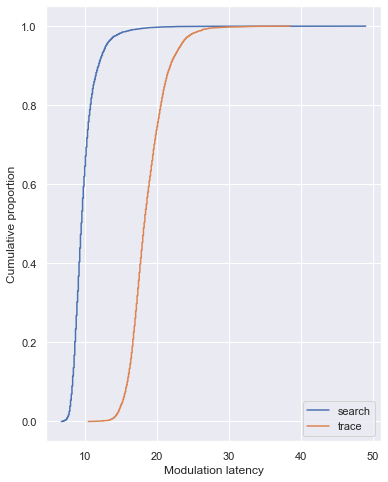

In [52]:

#TD = Target[:,:,:,:,:,i] - Distractor[:,:,:,:,:,i]
sns.set(rc={'figure.figsize':(6,8)})
TD = Target -Distractor
TD = np.transpose(TD,(0,1,2,3,5,4))
TD = np.nanmean(TD,axis=-2)
timesteps_search = latency_operation2(TD,'trace',TASK,9,criterion=0.5,dur = 50,position_on_curve=1)
X2 = np.sort(timesteps_search)
F2 = np.array(range(len(timesteps_search)))/float(len(timesteps_search))

timesteps_trace = latency_operation2(TD,'trace',TASK,9,criterion=0.5,dur=50,position_on_curve=-2)
X22 = np.sort(timesteps_trace)
F22 = np.array(range(len(timesteps_trace)))/float(len(timesteps_trace))

plt.plot(X2, F2)
plt.plot(X22, F22)
plt.legend(['search','trace'])
plt.ylabel('Cumulative proportion')
plt.xlabel('Modulation latency')


from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(timesteps_search, timesteps_trace, method="auto")
print(p)

if SAVE:
    plt.savefig(figure_folder+'\latency_' + TASK  +'.eps', format='eps')

In [28]:
operation = 'trace'
CurveLength = 9
number_interpolation_points=500
dur=50
criterion=0.5
TD = Target[:,:,:,:,:,1] - Distractor[:,:,:,:,:,1]
if operation == 'search':
    neurons = [0,1] #first two neurons correspond to the search operation
    position_on_curve = -1 #we arbitrarily put them at the end of the curve_length dimension in TD
elif operation == 'trace':
    neurons = np.arange(2,TD.shape[0])
else:
    raise Exception("Operation is either search or trace")

if operation == 'trace' and TASK == 'searchtrace':
    position_on_curve = 0 #in the search then trace task, the trace follows the search
elif operation == 'trace' and TASK == 'tracesearch':
    position_on_curve = CurveLength - 1 #in the trace then searcg task, the trace precedes the search
elif TASK == 'trace':
    position_on_curve = 0


#Interpolating the response curve to have non-integer latency of modulation   
normalized_TD = TD[neurons,:,:,position_on_curve,:]/np.expand_dims(np.max(np.abs(TD[neurons,:,:,position_on_curve,:]),axis = -1),axis=-1)
interpollation_function = scipy.interpolate.interp1d(np.arange(0,dur), normalized_TD, kind='linear',axis=-1)
interpolated_normalized_TD = interpollation_function(np.linspace(0, dur-1, num=number_interpolation_points))
smoothed_interpolated_normalized_TD = uniform_filter1d(interpolated_normalized_TD, size=100,axis = -1)


#Modulation condition: criterion * difference between beginning and end
condition = np.abs(np.max(smoothed_interpolated_normalized_TD,axis=-1)-np.min(smoothed_interpolated_normalized_TD,axis=-1)) * criterion + np.min(smoothed_interpolated_normalized_TD,axis=-1)
condition = np.expand_dims(condition,axis=-1)

#Getting the timestep when the modulation is greater than criterion%
latency = np.nanargmin(smoothed_interpolated_normalized_TD[:,:,:,::-1]>condition,axis=-1)
latency = latency.astype('float')
latency = 499 - latency

#Removing recording site with non-positive mor non monotonous modulation
latency[np.isnan(smoothed_interpolated_normalized_TD[:,:,:,0])] = np.nan
if not (operation == 'search' and TASK == 'searchtrace'):
    latency[smoothed_interpolated_normalized_TD[:,:,:,0] < -0.02] = np.nan
    latency[smoothed_interpolated_normalized_TD[:,:,:,0] > 0.02] = np.nan
latency[smoothed_interpolated_normalized_TD[:,:,:,0] > 0.5] = np.nan
latency[smoothed_interpolated_normalized_TD[:,:,:,-1] < 0.5] = np.nan #modulation at the end is lower than half of the max
latency[smoothed_interpolated_normalized_TD[:,:,:,0]>=0.5] = np.nan #modulation at the beggining is greater than half of the max
latency[np.abs(np.max(smoothed_interpolated_normalized_TD,axis=-1)-np.min(smoothed_interpolated_normalized_TD,axis=-1)) < 0.05] = np.nan #constant modulation
latency[np.max(smoothed_interpolated_normalized_TD,axis=-1)<=0] = np.nan #modulation is negative
latency[smoothed_interpolated_normalized_TD[:,:,:,-1] < smoothed_interpolated_normalized_TD[:,:,:,0]] = np.nan #modulation at the beginning is greater than at the end


#Keeping non nan entries
#latency = latency[~np.isnan(latency)]
#latency = latency.astype('int')
#latency = np.linspace(0, dur-1, num=number_interpolation_points)[latency] 

C:\Users\Sami\AppData\Local\Temp/ipykernel_21260/4040845212.py:24: RuntimeWarning: invalid value encountered in true_divide
  normalized_TD = TD[neurons,:,:,position_on_curve,:]/np.expand_dims(np.max(np.abs(TD[neurons,:,:,position_on_curve,:]),axis = -1),axis=-1)


In [131]:
np.where(np.linspace(0, dur-1, num=number_interpolation_points) >33)

(array([337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349,
        350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362,
        363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375,
        376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388,
        389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401,
        402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414,
        415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427,
        428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440,
        441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453,
        454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466,
        467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479,
        480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492,
        493, 494, 495, 496, 497, 498, 499], dtype=int64),)

In [24]:
np.where(latency<200)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [29]:
latency

array([[[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       ...,

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]]])

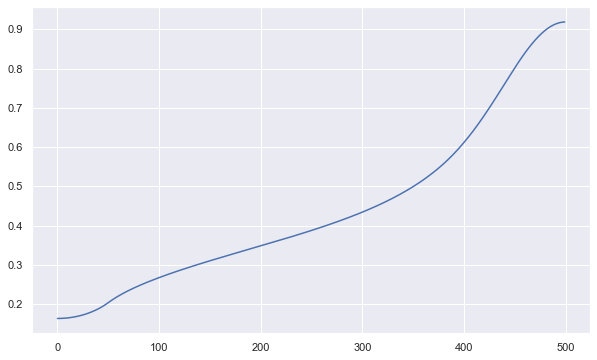

In [36]:
plt.plot(smoothed_interpolated_normalized_TD[25,3,3,:])

In [157]:
i = 2
smoothed_interpolated_normalized_TD[lat[0][index[i]],lat[1][index[i]],lat[2][index[i]],0]

0.04887506203913708

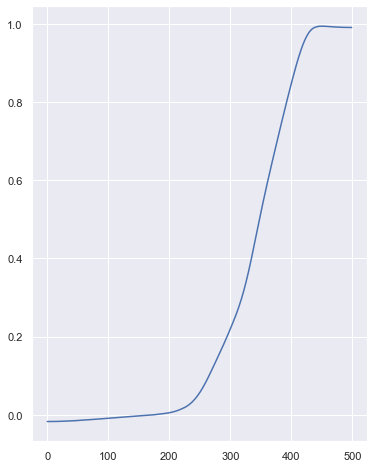

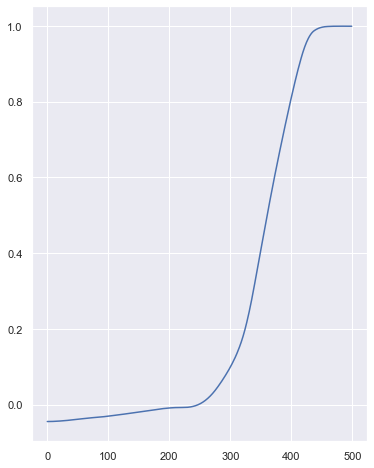

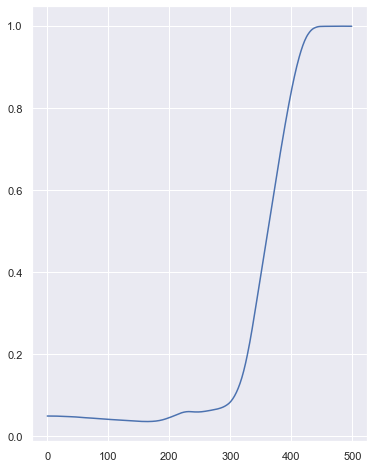

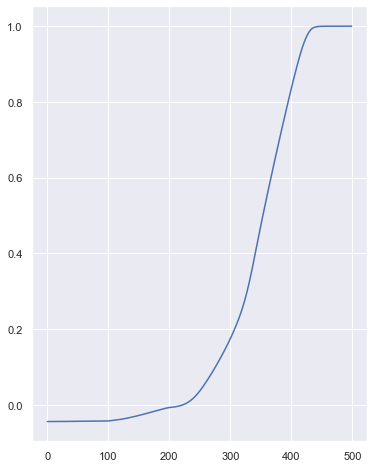

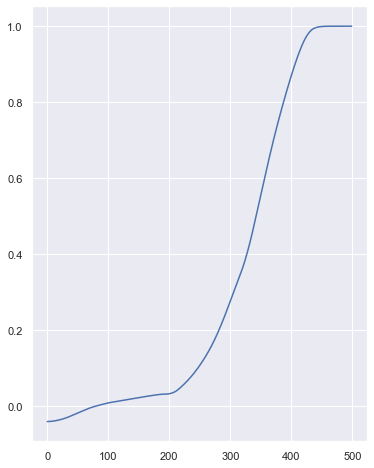

In [156]:

index = [0,10,100,200,240]
lat = np.where(latency>337)

for i in range(len(index)):
    plt.figure()
    plt.plot(smoothed_interpolated_normalized_TD[lat[0][index[i]],lat[1][index[i]],lat[2][index[i]],:])

In [120]:
smoothed_interpolated_normalized_TD.shape

(2, 4, 4, 500)

In [112]:
trace = smoothed_interpolated_normalized_TD[399,3,3,:]

condition = np.abs(np.max(trace)-np.min(trace)) * criterion + np.min(trace)
latency = np.nanargmin(smoothed_interpolated_normalized_TD[399,3,3,::-1]>condition)
latency = 499 - latency
latency

323

In [ ]:
np.nanargmin(smoothed_interpolated_normalized_TD[:,:,:,::-1]>condition,axis=-1)

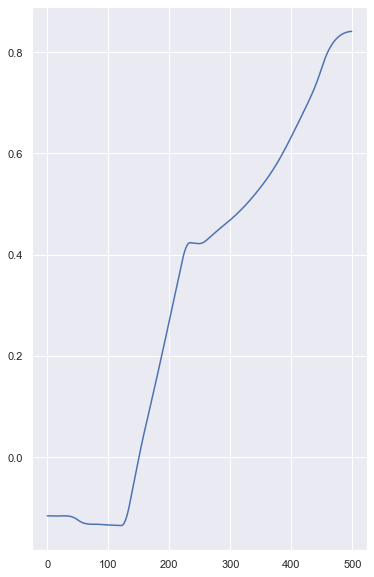

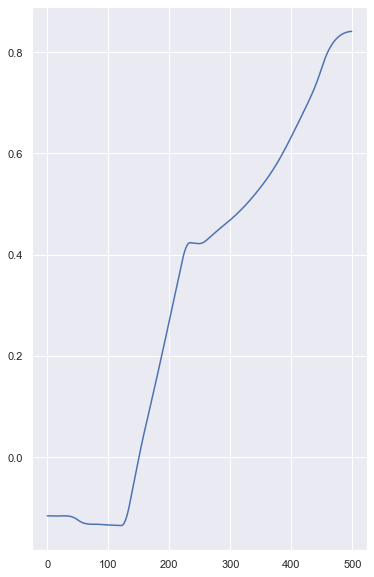

In [21]:
plt.plot(interpolated_normalized_TD[16,0,0,:])

In [26]:
interpolated_normalized_TD[16,0,0,0]

0.7506695015654365

0.7506695015654365

In [29]:
interpolated_normalized_TD[11,2,0,0]

0.7506695015654365

0.7506695015654365

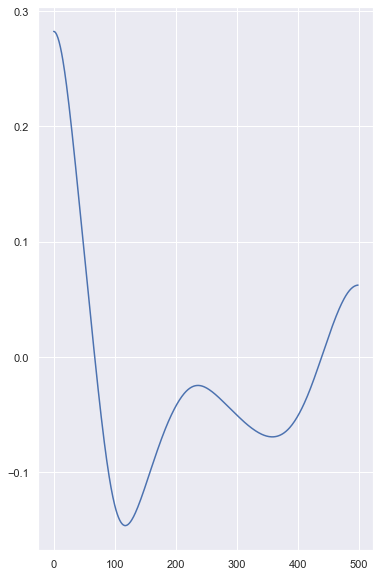

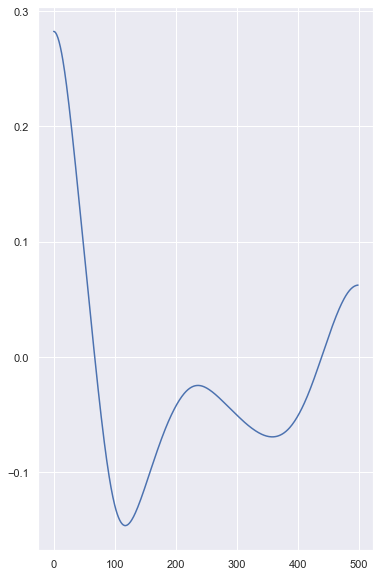

In [52]:
from scipy.ndimage.filters import uniform_filter1d
N = 1000
y = uniform_filter1d(interpolated_normalized_TD[12,1,1,::-1], size=100)
plt.plot(y)

In [74]:
condition = np.abs(np.max(interpolated_normalized_TD[30,2,0,:],axis=-1)-np.min(interpolated_normalized_TD[30,2,0,:],axis=-1)) * criterion + np.min(interpolated_normalized_TD[30,2,0,:],axis=-1)
#np.nanargmin(interpolated_normalized_TD[12,1,1,::-1]>condition,axis=-1)
condition

0.4015151131831152

0.4015151131831152

In [39]:
condition

-0.0198816092494154

-0.0198816092494154

In [38]:
np.searchsorted(interpolated_normalized_TD[12,1,1,:],condition, side='right', sorter=None)

440

440

In [ ]:
latency.shape

In [2]:
with open('NetworksTraceActivations1.pkl', 'rb') as input:
    results1 = pickle.load(input)
with open('NetworksTraceActivations2.pkl', 'rb') as input:
    results2 = pickle.load(input)
with open('NetworksTraceActivations3.pkl', 'rb') as input:
    results3 = pickle.load(input)
with open('NetworksTraceActivations4.pkl', 'rb') as input:
    results4 = pickle.load(input)

In [3]:
result = pd.concat([results1,results2,results3,results4],ignore_index=True)

In [4]:
result.to_pickle("NetworksTraceActivations.pkl")

In [ ]:
resultsdict = {'TargetTrace':TargetTrace,'DistractorTrace':DistractorTrace,'Corrects':Corrects,'Feature':Feature,'TargetCurve':TargetCurve,'DistractorCurve':DistrCurve,'NTrials':NumberOfTrial,'NPixels':LengthOfCurve}

In [23]:
traces['TargetTrace'][0].shape

(402, 4, 4, 10, 80)

In [26]:
TargetTrace = []
DistractorTrace = []
Corrects = []
Feature = []
TargetCurve = []
DistrCurve = []
NumberOfTrial = []
LengthOfCurve = []
for i in range(len(traces['TargetTrace'])):
    TargetTrace.append(traces['TargetTrace'][i][:,:,:,:,:50])
    DistractorTrace.append(traces['DistractorTrace'][i][:,:,:,:,:50])
    Corrects.append(traces['Corrects'][i])
    Feature.append(traces['Feature'][i])
    TargetCurve.append(traces['TargetCurve'][i])
    DistrCurve.append(traces['DistractorCurve'][i])
    NumberOfTrial.append(traces['NTrials'][i])
    LengthOfCurve.append(traces['NPixels'][i])
resultsdict = {'TargetTrace':TargetTrace,'DistractorTrace':DistractorTrace,'Corrects':Corrects,'Feature':Feature,'TargetCurve':TargetCurve,'DistractorCurve':DistrCurve,'NTrials':NumberOfTrial,'NPixels':LengthOfCurve}
df = pd.DataFrame(resultsdict)
df.to_pickle("NetworksTraceSearchActivations.pkl")

# Accessory network learning

In [3]:
if TASK == 'trace':
    networks_base = open_base('NetworksTrace')
elif TASK == 'searchtrace':
  networks_base = open_base('NetworksSearchTrace')
elif TASK == 'tracesearch':
  networks_base = open_base('NetworksTraceSearch')
else:
  raise Exception('TASK should be trace, tracesearch or searchtrace')

In [4]:
def ComputeZ(n,disruption,pixel_to_disrupte,target_hist,distr_hist,grid_size):
  if n.winner_disk:
      init = [torch.zeros_like(n.Y2), torch.zeros_like(n.Y1mod), torch.zeros_like(n.Y1), torch.zeros_like(n.Xmod)]
      init_disk = torch.autograd.grad(n.Z_disk[n.action], [n.Y2_disk, n.Y1mod_disk, n.Y1_disk, n.Xmod_disk], retain_graph=True, allow_unused=True)
  else:
      init = torch.autograd.grad(n.Z[n.action], [n.Y2, n.Y1mod, n.Y1, n.Xmod], retain_graph=True, allow_unused=True)
      init_disk = [torch.zeros_like(n.Y2_disk), torch.zeros_like(n.Y1mod_disk), torch.zeros_like(n.Y1_disk), torch.zeros_like(n.Xmod_disk)]

  Zy2 = init[0]
  Zy1mod = init[1]
  Zy1 = init[2]
  Zxmod = init[3]

  Zy2_disk = init_disk[0]
  Zy1mod_disk = init_disk[1]
  Zy1_disk = init_disk[2]
  Zxmod_disk = init_disk[3]

  target = np.zeros((20,t.curve_length,10))
  distractor = np.zeros((20,t.curve_length,10))

  for i in range(20):
      ZXmod_prev = Zxmod
      Zxmod_disk_prev = Zxmod_disk

      Zy2 = torch.autograd.grad(n.Y1mod, n.Y2test, grad_outputs=Zy1mod, retain_graph=True, allow_unused=True)[0]
      Zy2 = Zy2 + init[0]

      Zy1mod = torch.autograd.grad(n.Y2, n.Y1mod, grad_outputs=Zy2, retain_graph=True, allow_unused=True)[0]
      Zy1mod = Zy1mod + torch.autograd.grad(n.Xmod, n.Y1modtest, grad_outputs=Zxmod, retain_graph=True, allow_unused=True)[0]
      Zy1mod = Zy1mod + init[1]

      Zy1 = torch.autograd.grad(n.Y2, n.Y1, grad_outputs=Zy2, retain_graph=True, allow_unused=True)[0]
      Zy1 = Zy1 + torch.autograd.grad(n.Xmod, n.Y1test, grad_outputs=Zxmod, retain_graph=True, allow_unused=True)[0]
      Zy1 = Zy1 + init[2]

      if disruption:
        Zy1[0,:,target_hist[pixel_to_disrupte] % grid_size, target_hist[pixel_to_disrupte] //grid_size] = 0
        Zxmod[0,:,target_hist[pixel_to_disrupte] %grid_size, target_hist[pixel_to_disrupte] //grid_size] = 0
      Zxmod = torch.autograd.grad(n.Y1, n.Xmod, grad_outputs=Zy1, retain_graph=True, allow_unused=True)[0]
      Zxmod = Zxmod + torch.autograd.grad(n.Xmod, n.Xmodtest, grad_outputs=ZXmod_prev, retain_graph=True, allow_unused=True)[0]
      Zxmod = Zxmod + torch.autograd.grad(n.Xmod_disk, n.Xmodtest, grad_outputs=Zxmod_disk_prev, retain_graph=True, allow_unused=True)[0]
      Zxmod = Zxmod + init[3]
      if disruption:
        Zxmod[0,0,target_hist[pixel_to_disrupte] % grid_size, target_hist[pixel_to_disrupte] //grid_size] = 0
      for j in range(t.curve_length):
        target[i,j,trial] = Zxmod[0,0,target_hist[j] % grid_size, target_hist[j] //grid_size]
        distractor[i,j,trial] = Zxmod[0,0,distr_hist[j] % grid_size, distr_hist[j] //grid_size]

      Zy2_disk = torch.autograd.grad(n.Y1mod_disk, n.Y2test_disk, grad_outputs=Zy1mod_disk, retain_graph=True, allow_unused=True)[0]
      Zy2_disk = Zy2_disk + init_disk[0]

      Zy1mod_disk = torch.autograd.grad(n.Y2_disk, n.Y1mod_disk, grad_outputs=Zy2_disk, retain_graph=True, allow_unused=True)[0]
      Zy1mod_disk = Zy1mod_disk + torch.autograd.grad(n.Xmod_disk, n.Y1modtest_disk, grad_outputs=Zxmod_disk, retain_graph=True, allow_unused=True)[0]
      Zy1mod_disk = Zy1mod_disk + init_disk[1]

      Zy1_disk = torch.autograd.grad(n.Y2_disk, n.Y1_disk, grad_outputs=Zy2_disk, retain_graph=True, allow_unused=True)[0]
      Zy1_disk = Zy1_disk + torch.autograd.grad(n.Xmod_disk, n.Y1test_disk, grad_outputs=Zxmod_disk, retain_graph=True, allow_unused=True)[0]
      Zy1_disk = Zy1_disk + init_disk[2]

      Zxmod_disk = Zxmod_disk + torch.autograd.grad(n.Y1_disk, n.Xmod_disk, grad_outputs=Zy1_disk, retain_graph=True, allow_unused=True)[0]
      Zxmod_disk = Zxmod_disk + torch.autograd.grad(n.Xmod_disk, n.Xmodtest_disk, grad_outputs=Zxmod_disk_prev, retain_graph=True, allow_unused=True)[0]
      Zxmod_disk = Zxmod_disk + torch.autograd.grad(n.Xmod, n.Xmodtest_disk, grad_outputs=ZXmod_prev, retain_graph=True, allow_unused=True)[0]
      Zxmod_disk = Zxmod_disk + init_disk[3]
  return(target,distractor)

In [60]:
with open(r'C:\Users\Sami\Downloads\TraceTo4_2.pkl', 'rb') as input:
    n = pickle.load(input)

In [61]:
target = np.zeros((20,8,10))
distractor = np.zeros((20,8,10))
targetdis = np.zeros((20,8,10))
distractordis = np.zeros((20,8,10))
for network in range(1):
    trial = 0
    #n = networks_base['Network'][network]
    grid_size = 9
    while trial < 10:
      t=Trace(4)
      t.grid_size = grid_size
      t.no_curves = False
      t.curve_length = 8
      new_input, reward, trialEnd = t.doStep(0)
      target_hist = t.target_curve.copy()
      distr_hist = t.distractor_curve.copy()
      n.save_activities = False
      n.exploitation_probability = 1
      action = n.doStep(new_input,reward,trialEnd,device)
      new_input, reward, trialEnd = t.doStep(action)
      if reward == 0:
        continue
      #now do learn
      target_temp,distractor_temp =  ComputeZ(n,False,-1,target_hist,distr_hist,grid_size)
      targetdis_temp,distractordis_temp = ComputeZ(n,True,-1,target_hist,distr_hist,grid_size)
      target = target_temp
      distractor = distractor_temp
      targetdis = targetdis_temp
      distractordis = distractordis_temp
      trial += 1

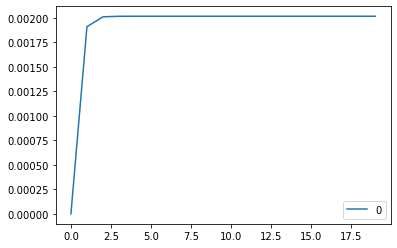

In [66]:
#trained to 4

aa = np.mean(target,axis=(2))
bb = np.mean(targetdis,axis=(2))
plt.plot(aa[:,5] - bb[:,5])
plt.legend(['0','2','3'])

In [67]:
networks_base.keys()

Index(['Network', 'Performance', 'Generalization'], dtype='object')